In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
sns.set_style('darkgrid')

In [46]:
gender_df=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
test_df=pd.merge(gender_df,test_df)

In [50]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
train_df.shape

(891, 12)

In [52]:
test_df.shape

(418, 12)

In [53]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
train_df.Age=imputer.fit_transform(train_df.Age.values.reshape(-1,1))
test_df.Age=imputer.fit_transform(test_df.Age.values.reshape(-1,1))

In [54]:
train_df=train_df.drop(['Name','Cabin','Ticket'],axis=1)
test_df=test_df.drop(['Name','Cabin','Ticket'],axis=1)

In [55]:
train_df=train_df.dropna(axis=0)
test_df=test_df.dropna(axis=0)

In [74]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/tmp/ipykernel_33/2668493456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Fare)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

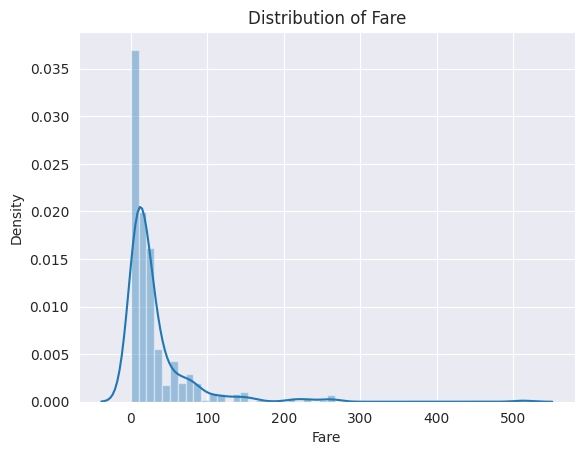

In [60]:
sns.distplot(train_df.Fare)
plt.title('Distribution of Fare')
plt.plot()

[]

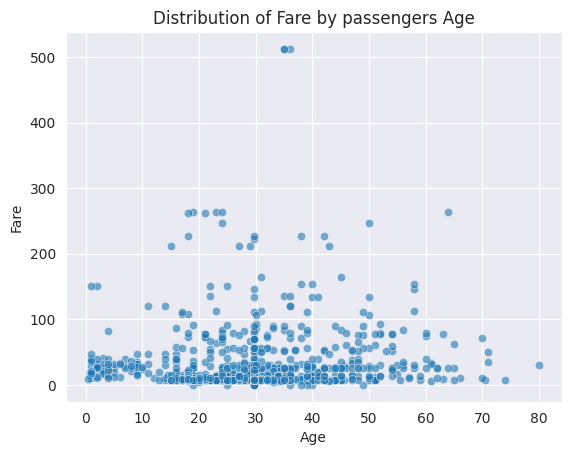

In [64]:
sns.scatterplot(train_df,x='Age',y='Fare',alpha=0.6)
plt.title('Distribution of Fare by passengers Age')
plt.plot()

[]

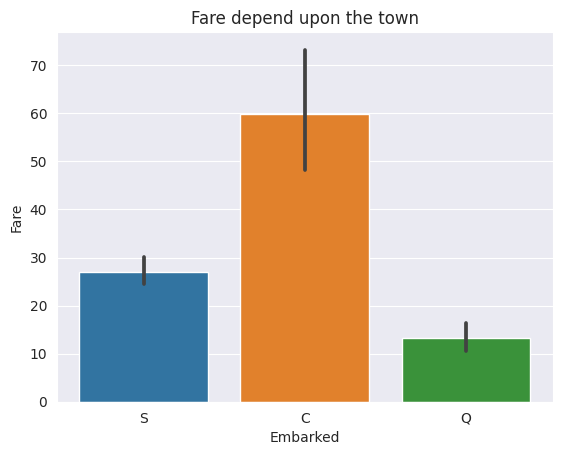

In [69]:
sns.barplot(train_df,x='Embarked',y='Fare')
plt.title('Fare depend upon the town')
plt.plot()

[]

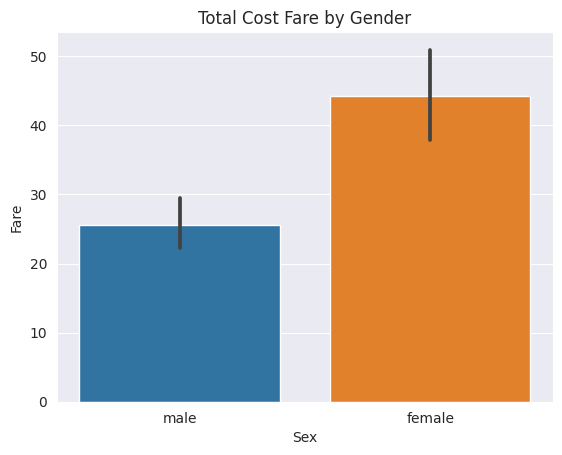

In [72]:
sns.barplot(train_df,x='Sex',y='Fare')
plt.title('Total Cost Fare by Gender')
plt.plot()

<Axes: xlabel='Survived', ylabel='Age'>

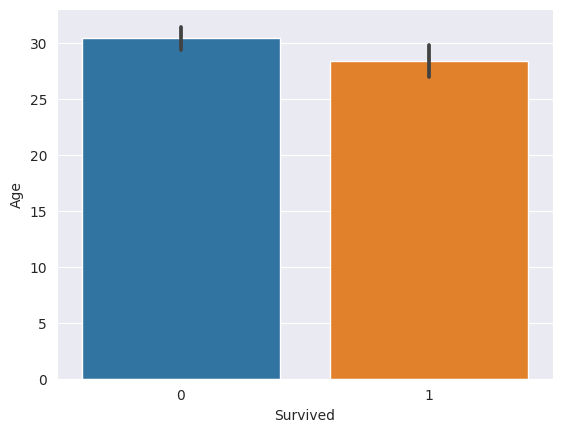

In [73]:
sns.barplot(train_df,x='Survived',y='Age')
plt.title('Survival depend on the Age')
plt.plot()

In [76]:
numerical_cols=train_df.select_dtypes(np.number).columns.tolist()
categorical_cols=train_df.select_dtypes('object').columns.tolist()

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_df[numerical_cols]=scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols]=scaler.fit_transform(test_df[numerical_cols])

In [85]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for cols in categorical_cols:
    train_df[cols]=encoder.fit_transform(train_df[cols])
    test_df[cols]=encoder.fit_transform(test_df[cols])

In [102]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.649044,0.367347,0.065523,0.063742,0.062649,1.535433
std,0.288762,0.486260,0.417350,0.477538,0.162960,0.137963,0.134460,0.097003,0.792088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015412,1.000000
50%,0.500000,0.000000,1.000000,1.000000,0.367921,0.000000,0.000000,0.028213,2.000000
75%,0.749438,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Pclass       889 non-null    float64
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    float64
 6   Parch        889 non-null    float64
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 69.5 KB


In [88]:
X=train_df.iloc[:,2:]
y=train_df.iloc[:,1]

In [92]:
from sklearn.model_selection import train_test_split
X_train,val_train=train_test_split(X,random_state=42,test_size=0.3)
X_test,val_test=train_test_split(y,random_state=42,test_size=0.3)

In [93]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,X_test)

LogisticRegression()

In [94]:
val_pred=model.predict(val_train)

In [101]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
accuracy=accuracy_score(val_pred,val_test)
score=f1_score(val_pred,val_test)
matrix=confusion_matrix(val_pred,val_test)
print(f"Accuracy Score of the model is {accuracy}")
print(f"F1 Score of the model is {score}")
print(f"Confusion Matrix Score of the model is {matrix}")

Accuracy Score of the model is 0.7902621722846442
F1 Score of the model is 0.7227722772277227
Confusion Matrix Score of the model is [[138  27]
 [ 29  73]]
